In [1]:
import requests

In [2]:
import pandas as pd

In [3]:
import json

In [4]:
from shapely.geometry import Point, Polygon, LineString, GeometryCollection

In [5]:
%%capture
!pip install geopandas

In [6]:
import geopandas

## Uppsala Polygon

In [7]:
f = open("/content/drive/MyDrive/Curb Food/Foodora-Polygons/uppsala.json", "r")

In [8]:
data = json.load(f)

In [9]:
len(data["delivery_area"]["coordinates"][0][0])

261

In [10]:
uppsala_poly = Polygon(data["delivery_area"]["coordinates"][0][0])

In [11]:
uppsala_poly.area

0.006253854207521072

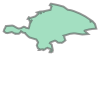

In [12]:
uppsala_poly

## Kungsholmen Polygon

In [13]:
f = open("/content/drive/MyDrive/Curb Food/Foodora-Polygons/kungsholmen.json", "r")

In [14]:
data = json.load(f)

In [15]:
len(data["delivery_area"]["coordinates"][0][0])

329

In [16]:
kungsholmen_poly = Polygon(data["delivery_area"]["coordinates"][0][0])

In [17]:
kungsholmen_poly.area

0.0018900052413336507

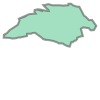

In [18]:
kungsholmen_poly

## Morby Polygon

In [19]:
f = open("/content/drive/MyDrive/Curb Food/Foodora-Polygons/morby.json", "r")

In [20]:
data = json.load(f)

In [21]:
len(data["delivery_area"]["coordinates"][0][0])

597

In [22]:
morby_poly = Polygon(data["delivery_area"]["coordinates"][0][0])

In [23]:
morby_poly.area

0.007121896930424482

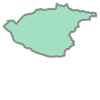

In [24]:
morby_poly

## Helsingborg Polygon

In [25]:
f = open("/content/drive/MyDrive/Curb Food/Foodora-Polygons/helsingborg.json", "r")

In [26]:
data = json.load(f)

In [27]:
len(data["delivery_area"]["coordinates"][0][0])

179

In [28]:
helsingborg_poly = Polygon(data["delivery_area"]["coordinates"][0][0])

In [29]:
helsingborg_poly.area

0.0053645805219731755

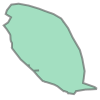

In [30]:
helsingborg_poly

## Arsta Polygon

In [31]:
f = open("/content/drive/MyDrive/Curb Food/Foodora-Polygons/arsta.json", "r")

In [32]:
data = json.load(f)

In [33]:
len(data["delivery_area"]["coordinates"][0][0])

336

In [34]:
arsta_poly = Polygon(data["delivery_area"]["coordinates"][0][0])

In [35]:
arsta_poly.area

0.015134585140123063

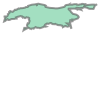

In [36]:
arsta_poly

## Load the geo-encoded address

In [37]:
import pickle

data_1 = pickle.load(open("/content/drive/MyDrive/Curb Food/address_geocoded_additional.pkl", "rb"))
data_2 = pickle.load(open("/content/drive/MyDrive/Curb Food/address_geocoded.pkl", "rb"))
data_3 = pickle.load(open("/content/drive/MyDrive/Curb Food/address_geocoded_helsingborgs.pkl", "rb"))

data = data_1 + data_2 + data_3
df_mapper = pd.DataFrame(data)


df_mapper = df_mapper.dropna(subset=["location"])
df_mapper["point"] = df_mapper["location"].apply(lambda loc: tuple(loc.point) if loc else None)
df_mapper[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_mapper['point'].tolist(), index=df_mapper.index)

df_mapper.head()

,address,location,point,latitude,longitude,altitude
2,"Tidagränd 26 , 128 43 , Bagarmossen, SE","(Tidagränd, Bagarmossen, Skarpnäcks stadsdelso...","(59.2713083, 18.1365033, 0.0)",59.271308,18.136503,0.0
15,"Drottningholmsvägen 308 , 167 31 , Bromma, SE","(308, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.3368639, 17.9564002, 0.0)",59.336864,17.956400,0.0
16,"Drottningholmsvägen 306 , 167 31 , Bromma, SE","(306, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.3369841, 17.9564832, 0.0)",59.336984,17.956483,0.0
17,"Drottningholmsvägen 298 , 167 31 , Bromma, SE","(298, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.3367403, 17.9577341, 0.0)",59.336740,17.957734,0.0
18,"Drottningholmsvägen 274 , 167 31 , Bromma, SE","(274, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.33565, 17.9626171, 0.0)",59.335650,17.962617,0.0


In [38]:
df_mapper.shape

(144452, 6)

In [39]:
# type(df_mapper["location"].iloc[0])

## Load population data

In [40]:
df_stockholm = pd.read_json("/content/drive/MyDrive/Curb Food/stockholm.jl", lines=True)
df_solna = pd.read_json("/content/drive/MyDrive/Curb Food/solna_danderyds_sollentuna_taby.jl", lines=True)
df_uppsala = pd.read_json("/content/drive/MyDrive/Curb Food/uppsala.jl", lines=True)
df_helsingborg = pd.read_json("/content/drive/MyDrive/Curb Food/helsingborgs.jl", lines=True)

In [41]:
print("Stockholm shape:", df_stockholm.shape)
print("Solna shape:", df_solna.shape)
print("Uppsala shape:", df_uppsala.shape)
print("Helsingborg shape:", df_helsingborg.shape)

Stockholm shape: (796269, 8)
Solna shape: (211147, 8)
Uppsala shape: (191982, 8)
Helsingborg shape: (120452, 8)


In [42]:
df = pd.concat([df_stockholm, df_solna, df_uppsala, df_helsingborg])

In [43]:
df.shape

(1319850, 8)

In [44]:
df.head()

,name,age,sex,marriage,address,city,postnumber,url
0,James Timm,48,None,None,Tidagränd 32,Bagarmossen,128 44,/19730325-Michael_James_Timm_Bagarmossen/DP-Cj...
1,Eva Rogström Timm,47,Kvinna,None,Tidagränd 32,Bagarmossen,128 44,/19740717-Eva_Karolina_Rogstrom_Timm_Bagarmoss...
2,Martin Holsten Hagnell,60,None,None,Tidagränd 30,Bagarmossen,128 44,/19610221-Martin_Andreas_Holsten_Hagnell_Bagar...
3,Eva Söderberg,60,Kvinna,None,Tidagränd 30,Bagarmossen,128 44,/19601108-Eva_Birgitta_Soderberg_Bagarmossen/1...
4,Margareta Hagnell,19,Kvinna,Ej gift,Tidagränd 30,Bagarmossen,128 44,/20020628-Sofia_Margareta_Hagnell_Bagarmossen/...


## Clean and enrich the data

In [45]:
# df[(df["address"].str.lower().str.contains("lgh"))]

In [46]:
df["is_apartment"] = (df["address"].str.lower().str.contains("lgh"))

In [47]:
df[["street", "apartment"]] = df["address"].str.split("lgh", expand=True)
df["formatted_address"] = df["street"] + " , " + df["postnumber"] + " , " + df["city"]  + ", SE"  

## Merging

In [48]:
df_merged = df.merge(df_mapper, left_on="formatted_address", right_on="address", how="left")

In [49]:
df_merged.shape

(1319850, 18)

In [50]:
# 778936/1199398

In [51]:
# 888393/1319850

In [52]:
print("% of missing data i.e. missing geocodes :", df_merged["point"].isna().sum()/df_merged.shape[0]*100)

% of missing data i.e. missing geocodes : 32.68985111944539


In [53]:
df_merged = df_merged.dropna(subset=["point"])

In [54]:
df_merged.shape

(888393, 18)

In [55]:
df_merged = geopandas.GeoDataFrame(df_merged, 
                             geometry=geopandas.points_from_xy(df_merged.longitude, df_merged.latitude))

In [56]:
df_merged.shape

(888393, 19)

In [57]:
df_merged["within_kungsholmen"] = df_merged["geometry"].within(kungsholmen_poly)
df_merged["within_uppsala"] = df_merged["geometry"].within(uppsala_poly)
df_merged["within_arsta"] = df_merged["geometry"].within(arsta_poly)
df_merged["within_morby"] = df_merged["geometry"].within(morby_poly)
df_merged["within_helsingborg"] = df_merged["geometry"].within(helsingborg_poly)

In [58]:
print("Kungsholmen Population :", df_merged["within_kungsholmen"].sum())
print("Uppsala Population :", df_merged["within_uppsala"].sum())
print("Arsta Population :", df_merged["within_arsta"].sum())
print("Morby Population :", df_merged["within_morby"].sum())
print("Helsingborg Population :", df_merged["within_helsingborg"].sum())
print("Total Population :", df_merged["within_kungsholmen"].sum()+df_merged["within_uppsala"].sum() + df_merged["within_arsta"].sum()
+df_merged["within_morby"].sum()+df_merged["within_helsingborg"].sum())

Kungsholmen Population : 71044
Uppsala Population : 73770
Arsta Population : 168722
Morby Population : 48258
Helsingborg Population : 84162
Total Population : 445956


In [59]:
445956/888393

0.5019805423950887

In [60]:
query = "SELECT  \
location, \
ROUND(COUNT(DISTINCT order_id)/COUNT(DISTINCT DATE(order_timestamp)),2) as average_daily_orders \
FROM `curbfood-data-platform.dashboards.deliverect_orders_all` \
WHERE DATE(order_timestamp) >= '2022-03-01' \
AND country = 'Sweden' \
AND channel = 'FOODORA' \
GROUP BY 1 \
"

In [61]:
project_id = 'curbfood-data-platform'

orders_data = pd.io.gbq.read_gbq(query, project_id=project_id)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=BOhLCGHXEKyY0xOnMZ5cpQbv6TXhdM&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWhxcChVQtW384KnVTOL4bpoi8dXpYsYztBPjFsWS6TPvMokiCbzaoY


In [62]:
orders_data.set_index("location", inplace=True)

In [63]:
orders_data[["population", "area"]] = 0

In [64]:
orders_data.loc["Kungsholmen", "population"] = df_merged["within_kungsholmen"].sum()
orders_data.loc["Uppsala", "population"] = df_merged["within_uppsala"].sum()
orders_data.loc["Årsta", "population"] = df_merged["within_arsta"].sum()
orders_data.loc["Mörby", "population"] = df_merged["within_morby"].sum()
orders_data.loc["Helsingborg", "population"] = df_merged["within_helsingborg"].sum()

In [65]:
orders_data.loc["Kungsholmen", "area"] = kungsholmen_poly.area
orders_data.loc["Uppsala", "area"] = uppsala_poly.area
orders_data.loc["Årsta", "area"] = arsta_poly.area
orders_data.loc["Mörby", "area"] = morby_poly.area
orders_data.loc["Helsingborg", "area"] = helsingborg_poly.area

In [66]:
orders_data.reset_index(inplace=True)

In [67]:
orders_data

,location,average_daily_orders,population,area
0,Uppsala,34.02,73770,0.006254
1,Kungsholmen,28.95,71044,0.001890
2,Helsingborg,16.16,84162,0.005365
3,Mörby,20.41,48258,0.007122
4,Årsta,50.50,168722,0.015135


In [68]:
query2 = "SELECT  \
DATE(order_timestamp) as date, location, \
COUNT(DISTINCT order_id) as daily_orders \
FROM `curbfood-data-platform.dashboards.deliverect_orders_all` \
WHERE DATE(order_timestamp) >= '2022-03-01' \
AND country = 'Sweden' \
AND channel = 'FOODORA' \
GROUP BY 1, 2 \
"

In [69]:
project_id = 'curbfood-data-platform'

location_daily_data = pd.io.gbq.read_gbq(query2, project_id=project_id)


In [70]:
location_daily_data

,date,location,daily_orders
0,2022-04-20,Uppsala,26
1,2022-03-10,Uppsala,29
2,2022-04-19,Kungsholmen,28
3,2022-04-19,Helsingborg,14
4,2022-04-24,Uppsala,39
...,...,...,...
275,2022-04-25,Uppsala,9
276,2022-04-25,Kungsholmen,9
277,2022-03-18,Helsingborg,24
278,2022-04-25,Mörby,1


In [71]:
%%capture
!pip install plotly==5.7.0

In [72]:
#@title
import plotly.express as px

fig = px.scatter(orders_data, x="average_daily_orders", y="population",
	         size="area", hover_name="location", size_max=60, trendline="ols")

# fig.update_xaxes(range=[5, 95])

fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [73]:
#@title
fig = px.box(location_daily_data.sort_values("location"), x="daily_orders", y="location")
# fig.update_xaxes(range=[10, 60])
fig.show()

In [74]:
orders_data.corr()

,average_daily_orders,population,area
average_daily_orders,1.000000,0.823413,0.726621
population,0.823413,1.000000,0.833177
area,0.726621,0.833177,1.000000
